# Ex1: Descriptive Statistics - Count_Cars

### Bài toán: Một thanh tra giao thông đã đếm số lượng ô tô đi qua một điểm nhất định trong 100 khoảng thời gian (cách nhau 20 phút). Các quan sát được liệt kê trong tập tin count_cars.txt.
1. Tạo cars_array từ nội dung tập tin.
2. Vẽ biểu đồ phân phối tần suất của cars_array
3. Thống kê cơ bản cho cars_array; mean, median, mode (gồm những giá trị nào? số lần là bao nhiêu?), max, min
5. Tìm range
5. Cho biết giá trị ở phân vị thứ [5, 15, 25, 50, 75, 90] của cars_array. Biểu diễn phân vị và giá trị tương ứng trên biểu đồ.
6. Vẽ boxplot của cars_array. Dùng z-score để xác định outliers (những index nào? giá trị outliers tương ứng cho những index đó?)
7. Tìm IQR cho car_arrays
8. Tìm phương sai (variance) cùa cars_array
9. Tìm độ lệch chuẩn Standard deviation của cars_array
10. Tìm độ xiên (Skewness) của cars_array. Nhận xét kết quả.
11. Tìm độ nhọn Kurtosis của cars_array. Nhận xét kết quả.

In [1]:
import numpy as np
from scipy import stats

In [2]:
# Tạo cars_array từ nội dung tập tin.
f=open("count_cars.txt", "r")

In [3]:
content = f.read()
content

'23 20 16 18 30 22 26 15 5 18\n14 17 11 37 21 6 10 20 22 25\n19 19 19 20 12 23 24 17 18 16\n27 16 28 26 15 29 19 35 20 17\n12 30 21 22 20 15 18 16 23 24\n15 24 28 19 24 22 17 19 8 18\n17 18 23 21 25 19 20 22 21 21\n16 20 19 11 23 17 23 13 17 26\n26 14 15 16 27 18 21 24 33 20\n21 27 18 22 17 20 14 21 22 19'

In [4]:
cars = content.split()
cars = list(map(int, cars))
cars_array = np.array(cars)
cars_array

array([23, 20, 16, 18, 30, 22, 26, 15,  5, 18, 14, 17, 11, 37, 21,  6, 10,
       20, 22, 25, 19, 19, 19, 20, 12, 23, 24, 17, 18, 16, 27, 16, 28, 26,
       15, 29, 19, 35, 20, 17, 12, 30, 21, 22, 20, 15, 18, 16, 23, 24, 15,
       24, 28, 19, 24, 22, 17, 19,  8, 18, 17, 18, 23, 21, 25, 19, 20, 22,
       21, 21, 16, 20, 19, 11, 23, 17, 23, 13, 17, 26, 26, 14, 15, 16, 27,
       18, 21, 24, 33, 20, 21, 27, 18, 22, 17, 20, 14, 21, 22, 19])

In [5]:
type(cars_array)

numpy.ndarray

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

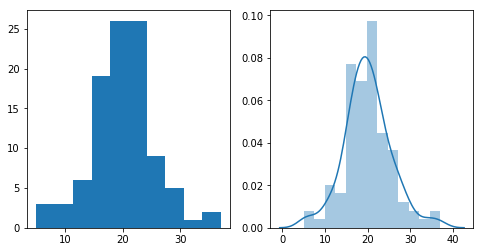

In [26]:
# Vẽ biểu đồ phân phối tần suất của cars_array
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.hist(cars_array)
plt.subplot(1, 2, 2)
sns.distplot(cars_array)
plt.show()

In [8]:
# Thống kê cơ bản cho cars_array; mean, median, mode (gồm những giá trị nào? số lần là bao nhiêu?), max, min
cars_array.mean()

19.97

In [9]:
cars_array.max()

37

In [10]:
cars_array.min()

5

In [11]:
cars_mode = stats.mode(cars_array)
cars_mode

ModeResult(mode=array([19]), count=array([9]))

In [12]:
cars_mode[0][0]

19

In [13]:
cars_mode[1][0]

9

In [14]:
# Tìm range
range_cars = np.ptp(cars_array)
range_cars

32

In [15]:
# Cho biết giá trị ở phân vị thứ [5, 15, 25, 50, 75, 90] của cars_array.
percentiles = np.array([5, 15, 25, 50, 75, 90])
x = np.percentile(cars_array, percentiles)
x

array([11., 15., 17., 20., 23., 27.])

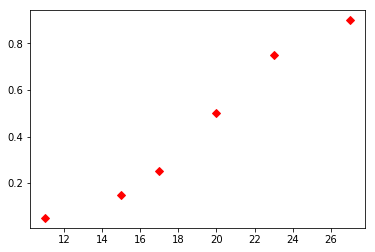

In [16]:
# Plot percentiles as red x's
plt.plot(x, percentiles/100, marker='D', color='red',
         linestyle='none')
plt.show()

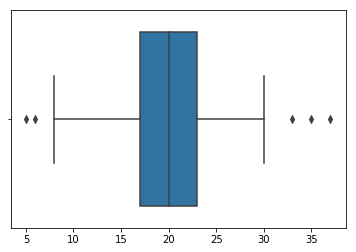

In [17]:
# Vẽ boxplot của cars_array
sns.boxplot(cars_array)

In [18]:
# Dùng z-score để xác định outliers
cars_z_score = stats.zscore(cars_array)
outliers = cars_z_score[[(n <=-2.5)|(n>=2.5) for n in cars_z_score]]
indexes = [cars_z_score.tolist().index(i) for i in outliers]
print("Indexes of outliers:",indexes)
print("Outlier values:", cars_array[indexes])

Indexes of outliers: [8, 13, 15, 37]
Outlier values: [ 5 37  6 35]


In [19]:
# IQR cho car_arrays
IQR = stats.iqr(cars_array)
IQR

6.0

In [20]:
# Tìm phương sai (variance) cùa cars_array
var_cars = np.var(cars_array)
var_cars

30.489099999999993

In [21]:
# Tìm độ lệch chuẩn Standard deviation của cars_array
std_cars = np.std(cars_array)
std_cars

5.52169358077755

In [22]:
# Tìm độ xiên (Skewness) của cars_array. Nhận xét kết quả.
skew_cars = stats.skew(cars_array)
skew_cars

0.21285259034645865

- Ta thấy skew_cras > 0 => phân phối lệch phải 

In [23]:
# Tìm độ nhọn Kurtosis của cars_array. Nhận xét kết quả.

In [24]:
kur_cars = stats.kurtosis(cars_array) # mặc định Fisher = True  thì kur - 3
kur_cars

0.9396339028047

In [25]:
kur_cars = stats.kurtosis(cars_array, fisher=False) 
kur_cars

3.9396339028047

- Với độ nhọn = 3 (theo Pearson) hoặc = 0 (theo Kurtosis ) thì sẽ là phân phối chuẩn , ở đây độ nhọn > 3 (>0) => phân bố này nhọn hơn phân bố chuẩn